## Imports and loader funcitons

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import numpy as np
import PIL
import os
import re

In [2]:
def imshow(img):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(img).convert("RGB"))
    
def imshow_on_axis(img, ax, title):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

            
def load_images_from_path(path, number):
    images = []
    srcs = []
    pattern = rf"^{number}(?!\d)"
    
    for filename in os.listdir(path):
        if re.match(pattern, filename):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                images.append(img)
                srcs.append(filename)

    return images, srcs


def load_images(number):
    final_images = []
    final_srcs = []

    final_path = f"data/final_submissions/{number}/"
    web_path = "data/web/"
    ai_path = "data/ai/"

    if not os.path.exists(final_path):
        print(f"The final submissions path '{final_path}' does not exist.")
        return None, None, None

    for filename in os.listdir(final_path):
        img = cv2.imread(os.path.join(final_path, filename))
        if img is not None:
            final_images.append(img)
            final_srcs.append(f"{number}_{filename}")

    web_images, web_srcs = load_images_from_path(web_path, number)
    ai_images, ai_srcs = load_images_from_path(ai_path, number)

    if not final_images:
        print(f"No images found in '{final_path}'. Please check the contents.")
        return None, None, None

    if not web_images and not ai_images:
        print(
            f"The number '{number}' does not correspond to any valid images in 'web' or 'ai' folders."
        )
        return None, None, None

    if not web_images:
        print(f"No web images found with prefix '{number}' in '{web_path}'.")
        return None, None, None
    if not ai_images:
        print(f"No AI images found with prefix '{number}' in '{ai_path}'.")
        return None, None, None

    return final_images, web_images, ai_images, final_srcs, web_srcs, ai_srcs

In [3]:
def read_csv(path):
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"Error reading the file: {e}")
        return None

## Analyze of violin plots

In [20]:
resnets=[]
new_columns = ["Final_Submission", "Inspiration", "Similarity"]

for i in range(1,28):
    resnets.append(read_csv(f"csv/csv2/{i}.csv"))


resnets = pd.concat(resnets, ignore_index=True)
resnets.columns = new_columns
resnets["Final_Submission"] = resnets["Final_Submission"].apply(lambda x: "_".join(x.split('/')[-2:]))
resnets["Inspiration"] = resnets["Inspiration"].apply(lambda x: x.split('/')[-1])


colors = read_csv("csv/color_similarity.csv")


print(colors.shape)
print(resnets.shape)

(8620, 3)
(8664, 3)


In [21]:
colors.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_1.jpg,0.622241
1,1_1.png,1A_10.jpg,0.886676
2,1_1.png,1A_2.jpg,0.800207
3,1_1.png,1A_3.jpg,0.775083
4,1_1.png,1A_4.jpg,0.815200


In [22]:
resnets.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_11.png,0.818425
1,1_1.png,1A_12.png,0.818425
2,1_1.png,1A_13.png,0.826663
3,1_1.png,1B_11.png,0.843834
4,1_1.png,1B_12_1.png,0.812419


In [24]:
# Create sets of (Final_Submission, Inspiration) tuples for each DataFrame
colors_combinations = set(colors[['Final_Submission', 'Inspiration']].itertuples(index=False, name=None))
resnets_combinations = set(resnets[['Final_Submission', 'Inspiration']].itertuples(index=False, name=None))

# Find missing combinations in each DataFrame
missing_in_resnets = colors_combinations - resnets_combinations
missing_in_colors = resnets_combinations - colors_combinations

# Print results
print("Combinations in 'colors' but missing in 'resnets':")
for combo in missing_in_resnets:
    print(combo)

print("\nCombinations in 'resnets' but missing in 'colors':")
for combo in missing_in_colors:
    print(combo)

Combinations in 'colors' but missing in 'resnets':

Combinations in 'resnets' but missing in 'colors':
('26_4.jpg', '26_12.png')
('26_6.jpg', '26_12.png')
('26_4.jpg', '26_11.png')
('26_4.jpg', '26_13.png')
('26_2.jpg', '26_12.png')
('26_6.jpg', '26_11.png')
('26_6.jpg', '26_13.png')
('26_7.jpg', '26_14.png')
('26_9.jpg', '26_12.png')
('26_2.jpg', '26_11.png')
('26_11.jpg', '26_12.png')
('26_9.jpg', '26_11.png')
('26_9.jpg', '26_13.png')
('26_2.jpg', '26_13.png')
('26_11.jpg', '26_11.png')
('26_3.jpg', '26_11.png')
('26_3.jpg', '26_12.png')
('26_1.jpg', '26_14.png')
('26_11.jpg', '26_13.png')
('26_3.jpg', '26_13.png')
('26_5.jpg', '26_14.png')
('26_8.jpg', '26_14.png')
('26_10.jpg', '26_14.png')
('26_7.jpg', '26_11.png')
('26_7.jpg', '26_12.png')
('26_7.jpg', '26_13.png')
('26_1.jpg', '26_11.png')
('26_1.jpg', '26_12.png')
('26_1.jpg', '26_13.png')
('26_4.jpg', '26_14.png')
('26_5.jpg', '26_12.png')
('26_6.jpg', '26_14.png')
('26_8.jpg', '26_12.png')
('26_10.jpg', '26_12.png')
('26_8.j

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load each CSV file, assuming they are named with a pattern like 'color_similarity_metric1.csv'
# file_paths = ["csv/color_similarity_metric1.csv", "csv/color_similarity_metric2.csv", "csv/color_similarity_metric3.csv"]
# metric_names = ["Metric 1", "Metric 2", "Metric 3"]

# # Combine each metric into a single DataFrame with a new 'Metric' column
# dfs = []
# for file_path, metric_name in zip(file_paths, metric_names):
#     df = pd.read_csv(file_path)
#     df['Metric'] = metric_name  # Add a column for metric type
#     dfs.append(df)

# # Concatenate all DataFrames
# all_data = pd.concat(dfs, ignore_index=True)

# # Plot the violin plot with metric type as hue
# plt.figure(figsize=(10, 8))
# sns.violinplot(data=all_data, x="Metric", y="Similarity", palette="muted")
# plt.title("Comparison of Similarity Metrics")
# plt.ylabel("Similarity")
# plt.xlabel("Metric")
# plt.show()

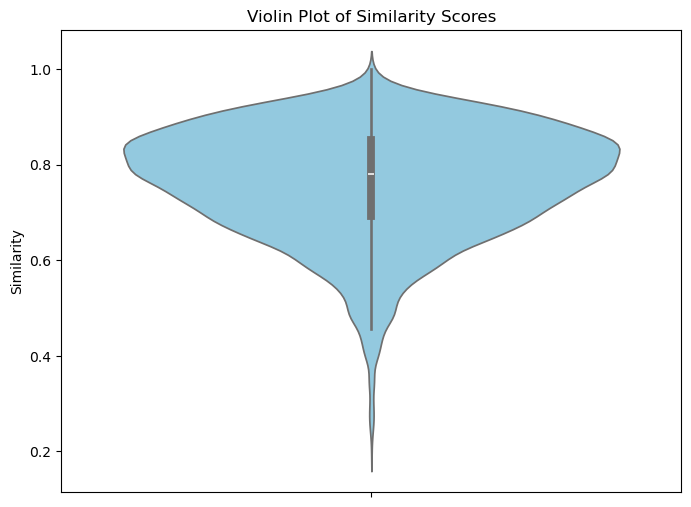

In [5]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=colors, y="Similarity", color="skyblue")
plt.title("Violin Plot of Similarity Scores")
plt.ylabel("Similarity")
plt.show()

## See bar plots of most simmilairty

In [ ]:
def show_simmilarity(group_id, metric = "Mean")